In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('C:/Users/User/OneDrive/Desktop/ML Class/dataset/healthcare-dataset-stroke-data.csv')
df.shape

(5110, 12)

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df['stroke'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64>

In [7]:
df = df.drop(columns=['id'])

In [8]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
df['bmi']=df['bmi'].fillna(df['bmi'].median())

In [10]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [11]:
df['gender']=df['gender'].replace("Other","Female")

In [12]:
cat_features = ['gender','ever_married','work_type','Residence_type','smoking_status']
num_features = ['age','avg_glucose_level','bmi','hypertension','heart_disease']

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

X = df.drop(columns=['stroke'])
y = df['stroke']

preprocess=ColumnTransformer([
    ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_features),
    ("num", StandardScaler(), num_features)
])
model=Pipeline([
    ("preprocess", preprocess),
    ("smote", SMOTE(random_state=42)),
    ("log_reg", LogisticRegression(max_iter=1000))
 ])
 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

model.fit(X_train,y_train)

,steps,"[('preprocess', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [24]:
from sklearn.metrics import accuracy_score
pred_values=model.predict(X_test)
accuracy_score(pred_values,y_test)

0.7504892367906066

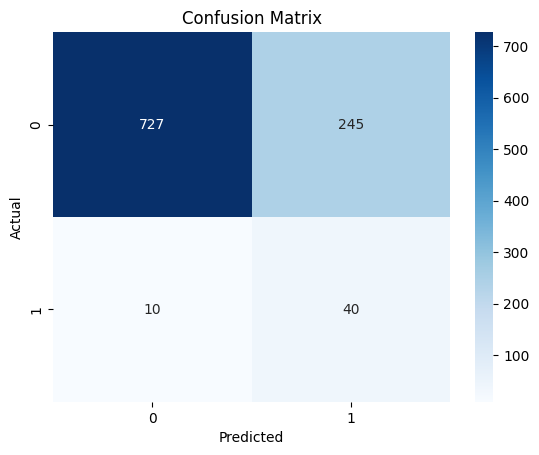

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, pred_values)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [34]:
from sklearn.metrics import classification_report
clr = classification_report(y_test, pred_values)
clr

'              precision    recall  f1-score   support\n\n           0       0.99      0.75      0.85       972\n           1       0.14      0.80      0.24        50\n\n    accuracy                           0.75      1022\n   macro avg       0.56      0.77      0.54      1022\nweighted avg       0.95      0.75      0.82      1022\n'

In [30]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, pred_values)

0.773971193415638

In [35]:
import joblib

joblib.dump(model, "stroke_midterm.pkl")

['stroke_midterm.pkl']